In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [3]:
print('train 의 데이터량 :', train_df.shape)
print('test 의 데이터량  :', test_df.shape)

train 의 데이터량 : (159571, 8)
test 의 데이터량  : (153164, 2)


In [4]:
train_df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
train_df.describe()
# 악플  / 심한 악플 / 선정적 악플 / 위협적 악플 / 모욕적 악플 / 인종 및 성소수자 비하 악플

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
len(train_df)

159571

In [7]:
unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('toxic이 아닌 비율 ', len(unlabelled_in_all)/len(train_df)*100)

toxic이 아닌 비율  89.83211235124176


In [8]:
no_comment = train_df[train_df['comment_text'].isnull()]
print('글이 없는 경우 : ', len(no_comment))

글이 없는 경우 :  0


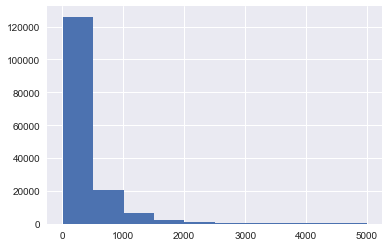

In [9]:
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))
train_df['char_length'].hist()
plt.show()

In [10]:
len(train_df[train_df['char_length']>=2000])

4055

In [11]:
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
# 악

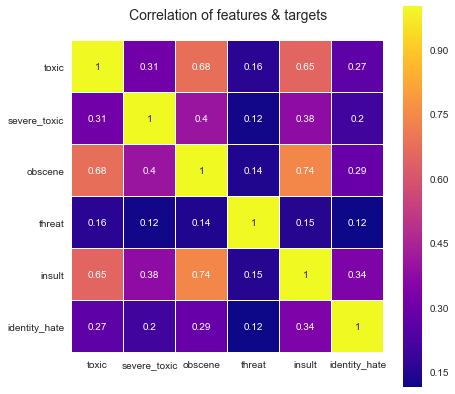

In [12]:
data = train_df[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub("what's", "what is ", text)
    text = re.sub("\'s", " ", text)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "cannot ", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am ", text)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [14]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [15]:
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [34]:
train_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
145643,1ff808746acc4f43,jezhotwells you appear partisan in starting an...,0,0,0,0,0,0,237
76626,cd2960675f7c45b7,edit summaries like no spewing crap out of you...,1,0,1,0,1,0,78
136676,db2685df22130c5b,stop being an annoying fag you are one of thos...,1,0,1,0,1,0,136
2139,05c7b99e5b754c4c,amcom article hi earlier today i noticed that ...,0,0,0,0,0,0,850
42584,71a6ef725291bcf4,your deletions it seems you are a danger to wi...,0,0,0,0,0,0,199
52615,8cb5ae5d023fea4b,personal attack oh do you know portuguese on w...,1,0,0,0,0,0,192
50216,8638f7ffdf31207a,what exactly does saying how are you niggers t...,1,0,1,0,1,1,532
126978,a71494db74f42cfe,oh once upon a time as most fairy tales begin ...,0,0,0,0,0,0,341
78308,d18eb4d8da2c50c3,and exactly what so called fundamental errors ...,0,0,0,0,0,0,856
58847,9d99fcbb42a1092f,like being annoying,0,0,0,0,0,0,22


In [26]:
train_df[train_df['id']=='f065e48d0bc9a26f']['comment_text']

89860    hey jerk go write about gardening or britney s...
Name: comment_text, dtype: object

In [27]:
train_X = train_df.comment_text
test_X = test_df.comment_text

In [37]:
train_X[76626]

'edit summaries like no spewing crap out of your ass are not acceptable'

## Vectorize the data

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [41]:
X_dtm = vect.fit_transform(train_X)

In [43]:
vect.idf_

array([6.49561527, 5.89434905, 7.98981792, ..., 6.95922716, 8.15193677,
       8.3552777 ])

In [44]:
test_X_dtm = vect.transform(test_X)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_X.content, article_df.category, \
                                                    test_size = 0.1, random_state =1)
#10%를 테스트로


NameError: name 'article_df' is not defined

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=1.0)

# create submission file
submission_binary = pd.read_csv('../input/sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing toxic
Training accuracy is 0.9597107243797431
... Processing severe_toxic
Training accuracy is 0.9910134046913286
... Processing obscene
Training accuracy is 0.9798459619855738
... Processing threat
Training accuracy is 0.9972739407536457
... Processing insult
Training accuracy is 0.972802075565109
... Processing identity_hate
Training accuracy is 0.9925926390133546


In [54]:
# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [58]:
# generate submission file
submission_binary.to_csv('submission_binary.csv',index=False)
submission_chains = pd.read_csv('../input/sample_submission.csv')

In [59]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing toxic
Training Accuracy is 0.9597107243797431
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing severe_toxic
Training Accuracy is 0.9909820706770027
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing obscene
Training Accuracy is 0.982534420414737
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing threat
Training Accuracy is 0.9974055436138145
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing insult
Training Accuracy is 0.9796642247024835
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing identity_hate
Training Accuracy is 0.9938585331921214
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [60]:
submission_chains.to_csv('submission_chains.csv', index=False)

##  Create a combined submission

In [61]:
# create submission file
submission_combined = pd.read_csv('../input/sample_submission.csv')

In [62]:
# corr_targets = ['obscene','insult','toxic']
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])

In [63]:
submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.998498,0.296448,0.995494,0.041615,0.905192,0.367308
1,0000247867823ef7,0.009770,0.001494,0.003772,0.001006,0.005991,0.001844
2,00013b17ad220c46,0.015914,0.000764,0.004215,0.000490,0.006965,0.001452
3,00017563c3f7919a,0.004188,0.001272,0.003238,0.000661,0.002744,0.000567
4,00017695ad8997eb,0.024984,0.000738,0.002516,0.000724,0.004157,0.001067


In [64]:
len(submission_combined)

153164